In [1]:
%pylab nbagg
from comocmaes_many import Comocmaes
from problems import BiobjectiveConvexQuadraticProblem as problem
import cma
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [5]:
dim = 10
num_kernels = 3
myproblem0 = problem(dim, name = "sphere")
fun0 = myproblem0.objective_functions()
myproblem1 = problem(dim, name = "sphere")
myproblem1.sep(1)
fun1 = myproblem1.objective_functions()
fun = fun0[0], fun0[1], fun1[1]

def evaluate(x_var):
    return [ fonction(x_var) for fonction in fun]
x0 = np.zeros(dim)
sigma0 = 0.2
refpoint = [1.1, 1.1, 1.1]

moes = Comocmaes(x0, sigma0, evaluate, num_kernels, refpoint)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=558480, Sat Jul  6 04:23:29 2019)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=506195, Sat Jul  6 04:23:29 2019)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=518696, Sat Jul  6 04:23:29 2019)


In [6]:
fun

(<function problems.BiobjectiveConvexQuadraticProblem.objective_functions.<locals>.fun1(x)>,
 <function problems.BiobjectiveConvexQuadraticProblem.objective_functions.<locals>.fun2(x)>,
 <function problems.BiobjectiveConvexQuadraticProblem.objective_functions.<locals>.fun2(x)>)

In [7]:
moes.optimize(evaluate)

In [8]:
moes.stop()

True

<IPython.core.display.Javascript object>


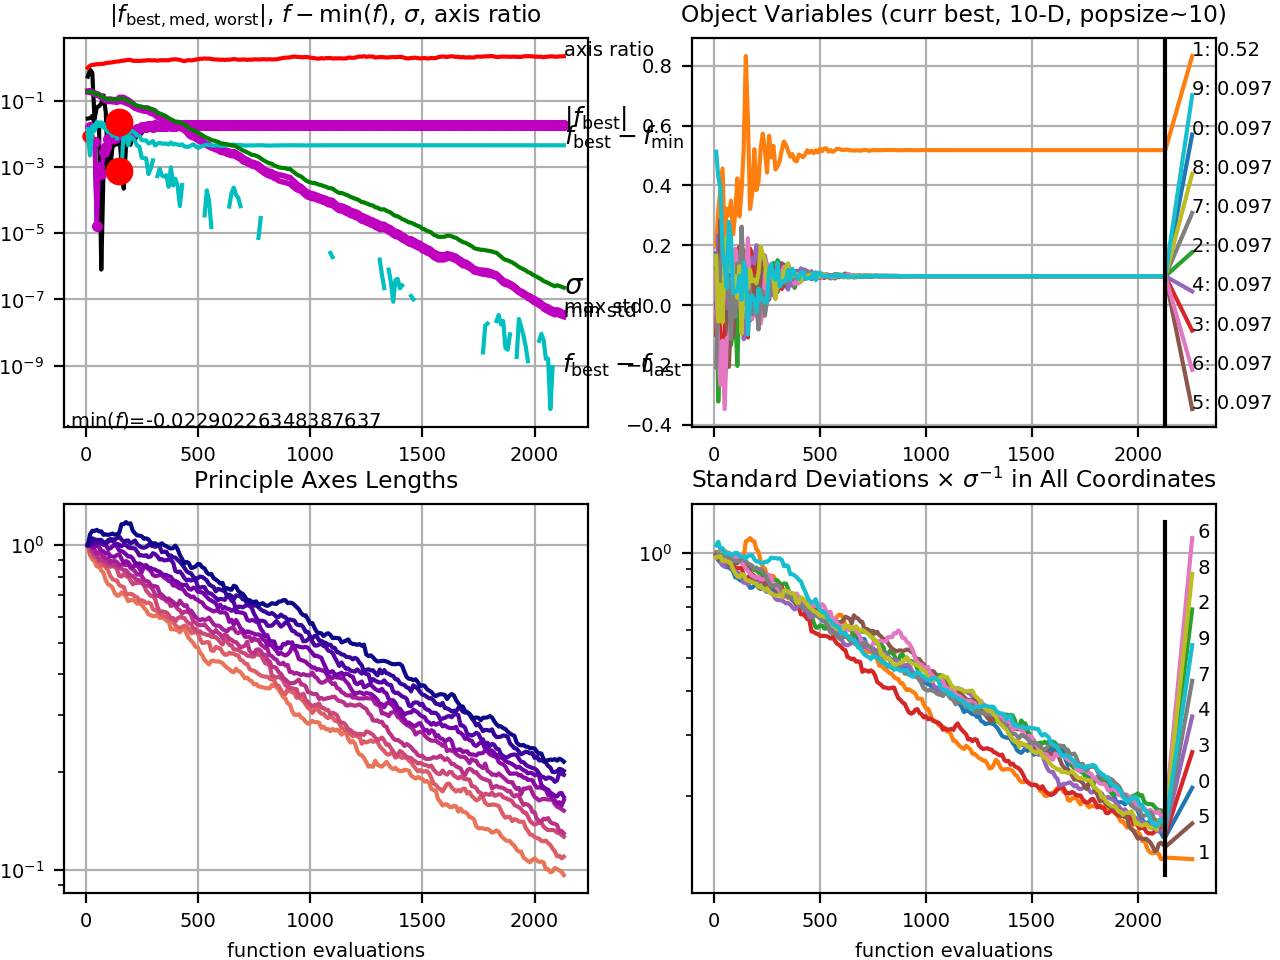

In [11]:
cma.plot("2")

In [ ]:
#restart the notebook from here + do correct setting without calling "optimize"

In [ ]:
while not moes.stop():
    X = moes.ask()
    F = [moes.evaluate(x) for x in X]
    moes.tell(X,F)

In [ ]:
moes.stop()

In [ ]:
cma.plot("0")

In [ ]:
cma.plot("1")

In [ ]:
cma.plot("2")

In [ ]:
kernel = moes.kernels[0]
kernel.opts["CMA_elitist"] = True

In [ ]:
kernel.opts["popsize"]

In [ ]:
def front2obj(titlelabelsize = 18, axislabelsize = 16):
    """
    """
    plt.figure()
    f1 = np.array([kernel.fit.fitness[0] for kernel in moes.kernels])
    f2 = np.array([kernel.fit.fitness[1] for kernel in moes.kernels])
    plt.grid(which = "major")
    plt.grid(which = "minor")

    plt.plot(f1,f2,'o')
    plt.xlabel('first objective function', fontsize=axislabelsize)
    plt.ylabel('second objective function', fontsize=axislabelsize)
    plt.title("Pareto front, {}D, {} kernels".format(moes.dim,
        moes.num_kernels), fontsize=titlelabelsize)         


In [ ]:
front2obj()

In [ ]:
def front3obj(titlelabelsize = 18, axislabelsize = 16):
    """
    """
    plt.figure()
    f1 = np.array([kernel.fit.fitness[0] for kernel in moes.kernels])
    f2 = np.array([kernel.fit.fitness[1] for kernel in moes.kernels])
    plt.grid(which = "major")
    plt.grid(which = "minor")

    plt.plot(f1,f2,'o')
    plt.xlabel('first objective function', fontsize=axislabelsize)
    plt.ylabel('second objective function', fontsize=axislabelsize)
    plt.title("Pareto front, {}D, {} kernels".format(moes.dim,
        moes.num_kernels), fontsize=titlelabelsize)         
